In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
def generateZ(mu,cov):
  #generating points
  x, y = np.meshgrid(np.linspace(-1,6,1000),np.linspace(-1,6,1000))
  xy = np.column_stack([x.flat, y.flat])
  #density values at the generated points
  Z = mvn.pdf(xy, mu, cov).reshape(x.shape)
  return x,y,Z

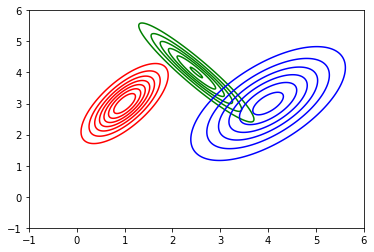

In [3]:
mu1 = np.array([1,3])

cov1 = np.array([[0.2,0.1],
                [0.2,0.4]])

x1,y1,Z1=generateZ(mu1,cov1)

mu2 = np.array([2.5,4])
cov2 = np.array([[0.4,0.5],
                 [-0.5,0.7]])
x2,y2,Z2=generateZ(mu2,cov2)               

mu3 = np.array([4,3])
cov3 = np.array([[0.7,0.5],
                 [0.5,0.9]])
x3,y3,Z3=generateZ(mu3,cov3)  

plt.contour(x1, y1, Z1,colors='red')
plt.contour(x2, y2, Z2,colors='green')
plt.contour(x3, y3, Z3,colors='blue')
plt.show()

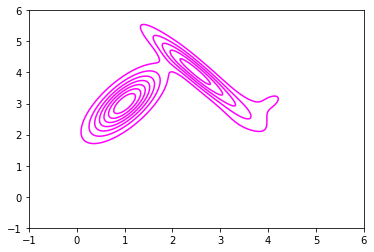

In [4]:
# Contours of the marginal probability density p(x) of the mixture distribution which has pi_1=0.5, pi_2=0.3 and pi_3=0.2
pi_1 = 0.5
pi_2 = 0.3
pi_3 = 0.2
Z=pi_1*Z1 + pi_2*Z2 + pi_3*Z3
plt.contour(x1,y1,Z,colors='magenta')

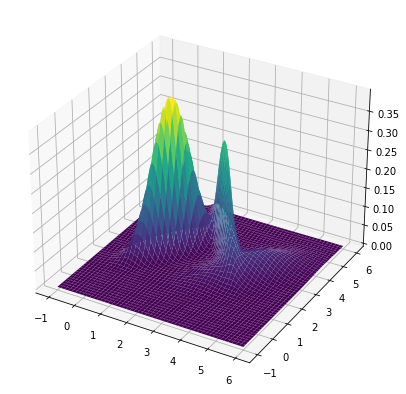

In [5]:
fig=plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(x1, y1, Z,cmap='viridis', edgecolor='none')
plt.show()

In [6]:
arr=[]
for i in range(0,500):
  z=np.random.multinomial(1,[pi_1,pi_2,pi_3])
  if z[0]==1:
    p=np.random.multivariate_normal(mu1,cov1,1)
  if z[1]==1:
    p=np.random.multivariate_normal(mu2,cov2,1)
  if z[2]==1:
    p=np.random.multivariate_normal(mu3,cov3,1)
  p=p.reshape(-1)
  p=np.append(p,np.argmax(z)+1)
  arr.append(p)
  

/tmp/ipykernel_47924/2202564395.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  p=np.random.multivariate_normal(mu1,cov1,1)
/tmp/ipykernel_47924/2202564395.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  p=np.random.multivariate_normal(mu2,cov2,1)


In [7]:
df=pd.DataFrame(arr)
df

,0,1,2
0,1.488083,2.387119,1.0
1,3.355402,2.614079,2.0
2,3.683169,1.672160,3.0
3,2.543891,2.839966,2.0
4,3.074084,4.355744,2.0
...,...,...,...
495,2.236409,4.069464,2.0
496,3.841064,4.234412,3.0
497,5.358028,5.201398,3.0
498,4.849253,2.877278,3.0


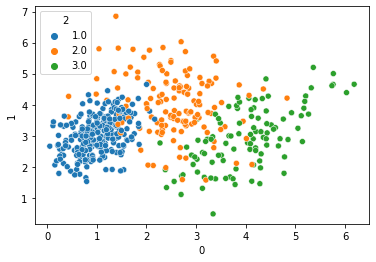

In [8]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],palette='tab10')
plt.show()

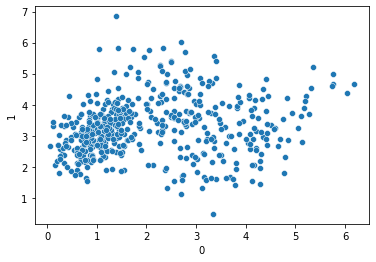

In [9]:
sns.scatterplot(x=df[0],y=df[1],palette='tab10')
plt.show()

In [10]:
posterior_prob=np.zeros((1,3))

In [11]:
for i in range(0,df.shape[0]):
  posterior=np.zeros((1,3)) 
  posterior[0][0]=pi_1*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mu1,cov1)/(float)(len(df[df[2]==1.0]))
  posterior[0][1]=pi_2*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mu2,cov2)/(float)(len(df[df[2]==2.0]))
  posterior[0][2]=pi_3*mvn.pdf([df.iloc[i][0],df.iloc[i][1]],mu3,cov3)/(float)(len(df[df[2]==3.0]))
  posterior[0][0]=posterior[0][0]/(posterior[0][0]+posterior[0][1]+posterior[0][2])
  posterior[0][1]=posterior[0][1]/(posterior[0][0]+posterior[0][1]+posterior[0][2])
  posterior[0][2]=posterior[0][2]/(posterior[0][0]+posterior[0][1]+posterior[0][2])
  
  posterior_prob=np.append(posterior_prob,posterior,axis=0)
posterior_prob.shape

(501, 3)

In [12]:
posterior_prob=posterior_prob[1:]

In [13]:
posterior_prob.shape

(500, 3)

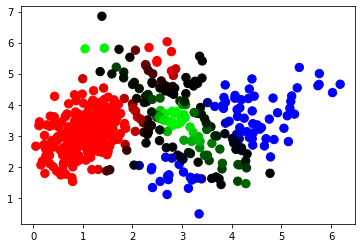

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = df[0]
y = df[1]
rgb = posterior_prob

fig, ax = plt.subplots()
plt.scatter(x, y, s=70, facecolors=rgb)
plt.show()

### The above figure depicts the scatter-plot in which the colours represent the value of the responsibilities γ(z_nk) associated with data point x_n, obtained by plotting the corresponding point using proportions of red, blue, and green ink given by γ(z_nk) for k = 1, 2, 3, respectively.